# Análisis del valor estratégico de cada provincia de Westeros mediante pagerank, análisis de redes y visualización de mapas.

In [1]:
#limpieza de variables y directorio
rm(list=ls())
setwd("~")
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,510405,27.3,1098210,58.7,649892,34.8
Vcells,976854,7.5,8388608,64.0,1599076,12.2


In [2]:
#Carga de las bibliotecas
library(igraph)
library(png)
library(dplyr)

Warning message:
"package 'igraph' was built under R version 3.5.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:igraph':

    as_data_frame, groups, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
#Definición de las regiones y provincias de Westeros
westeros.regions <- data.frame(
  id.reg = 1:9,
  region = c("THE NORTH", "THE RIVERLANDS", "THE VALE OF ARRYN",
             "THE IRON ISLANDS", "THE WESTERLANDS", "THE CROWNLANDS",
             "THE STORMLANDS", "THE REACH", "DORNE"),
  territories = c(13, 5, 4, 2, 5, 4, 4, 7, 4),
  value = c(5, 2, 1, 1, 2, 2, 1, 4, 1),
  color = c("gray", "darkblue", "darkgreen", "darkgoldenrod4",
            "darkorchid4", "darkgoldenrod1", "darkgoldenrod2",
            "darkolivegreen3", "coral"))

westeros.provinces <- data.frame(
  id.prov = 1:48,
  province = c("SKAGOS", "THE GIFT", "KARHOLD", "WINTERFELL", "THE DREADFORT",
               "WIDOWS WATCH", "BEAR ISLANDS", "WOLFSWOOD", "WHITE HARBOR",
               "STONEY SHORE", "BARROWLANDS", "CAPE KRAKEN", "THE NECK",
               "THE TWINS", "THE TRIDENT", "RIVERRUN", "MARRENMAL", "STONEY SEPT",
               "THE FINGERS", "THE EYRIE", "GULLTOWN", "MOUNTAINS OF THE MOON",
               "PYKE", "HARLAW",
               "THE CRAG", "GOLDEN TOOTH", "CASTERLY ROCK", "SILVERHILL", "CRAKEHALL",
               "CRACKLAW POINT", "DRAGONSTONE", "KINGS LANDING", "KINGSWOOD",
               "STORMS END", "TARTH", "RAINWWOOD", "DORNISH MARCHES",
               "BLACKWATER RUSH", "THE MANDER", "SEAROAD MARSHES", "HIGH GARDEN",
               "OLDTOWN", "THREE TOWERS", "THE ARBOR",
               "RED MOUNTAINS", "SANDSTONE", "GREENBLOOD", "SUNSPEAR"),
  region = c(rep("THE NORTH", 13),
             rep("THE RIVERLANDS", 5),
             rep("THE VALE OF ARRYN", 4),
             rep("THE IRON ISLANDS", 2),
             rep("THE WESTERLANDS", 5),
             rep("THE CROWNLANDS", 4),
             rep("THE STORMLANDS", 4),
             rep("THE REACH", 7),
             rep("DORNE", 4)),
  x = c(
    1.77, 1.60, 1.70, 1.50, 1.62, 1.65, 1.30, 1.35, 1.60, 1.20,
    1.35, 1.20, 1.40, 1.42, 1.45, 1.42, 1.55, 1.41, 1.70, 1.75,
    1.75, 1.60, 1.20, 1.25, 1.30, 1.33, 1.27, 1.30, 1.21, 1.70,
    1.77, 1.60, 1.62, 1.70, 1.79, 1.70, 1.57, 1.45, 1.45, 1.30,
    1.30, 1.20, 1.23, 1.15, 1.40, 1.40, 1.60, 1.80),
  y = c(
    1.95, 1.92, 1.85, 1.80, 1.82, 1.75, 1.88, 1.77, 1.65, 1.73,
    1.70, 1.58, 1.60, 1.53, 1.48, 1.42, 1.40, 1.38, 1.56, 1.50,
    1.45, 1.47, 1.47, 1.48, 1.42, 1.38, 1.35, 1.31, 1.30, 1.38,
    1.36, 1.35, 1.27, 1.23, 1.22, 1.17, 1.18, 1.30, 1.23, 1.25,
    1.18, 1.15, 1.05, 1.02, 1.12, 1.05, 1.05, 1.05))


In [5]:
# Se establecen castillos y puertos
castles <- c(4,5,11, 14,16,17, 20, 23, 27,29, 31,32, 34,37, 39,41,42, 46,48)
ports <- c(6,9,8,12, 15, 21, 23,24, 27, 31,32, 34, 42, 48)

In [6]:
# Se definen puertos este/oeste (basado en el mismo vector ports)
port_east <- c(TRUE, TRUE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE,
               TRUE, TRUE, TRUE, FALSE, TRUE)

In [7]:
# Se agregan castillos y puertos a las provincias.
westeros.provinces$castle <- ifelse(
  test = westeros.provinces$id.prov %in% castles,
  yes = TRUE,
  no = FALSE)
westeros.provinces$port <- ifelse(
  test = westeros.provinces$id.prov %in% ports,
  yes = TRUE,
  no = FALSE)

In [9]:
# Se pega toda la informacion
westeros.map <- merge(westeros.provinces, westeros.regions, by="region", all=TRUE)

north_edges <- c(
  1,2, 1,3,
  2,3, 2,4, 2,5,
  3,5,
  4,5, 4,6, 4,9, 4,11, 4,8, 4,7,
  5,6,
  6,9,
  7,8, 7,10,
  8,10, 8,11,
  9,11, 9,13,
  10,11,
  11,13,
  12,13)

riverlands_edges <- c(
  14,15,
  15,16, 15,17,
  16,17, 16,18,
  17,18)

arryn_edges <- c(
  19,22,
  20,21, 20,22)

islands_edges <- c(23,24)

westerlands_edges <- c(
  25,26, 25, 27,
  26,27,
  27,28, 27,29,
  28,29)

crownlands_edges <- c(
  30,31, 30,32,
  31,33,
  32,33)

stormlands_edges <- c(
  34,35, 34,36, 34,37,
  35,36,
  36,37)

reach_edges <- c(
  38,39, 38,40, 38,41,
  39,41,
  40,41,
  41,42, 41,43,
  42,43, 42,44,
  43,44)

dorne_edges <- c(
  45,46, 45,47,
  46,47,
  47,48)

# Para las distintas regiones
region_edges <- c(13,14, 13,22, 13,24, 14,24, 14,22, 15,22, 16,23, 16,25,
                  16,26, 17,22, 17,32, 17,38, 18,26, 18,27, 18,28, 18,38,
                  23,25, 28,38, 28,40, 29,40, 32,38, 33,34, 33,38, 33,39,
                  34,39, 37,39, 37,41, 37,45, 41,45, 43,45)


In [10]:
# Se junta toda la informacion
complete_edges <- c(
  north_edges,
  riverlands_edges,
  arryn_edges,
  islands_edges,
  westerlands_edges,
  crownlands_edges,
  stormlands_edges,
  reach_edges,
  dorne_edges,
  #   port_edges,
  region_edges)

## Análisis de redes

In [11]:
#Análisis de redes
westeros.map <- westeros.map[order(westeros.map$id.prov),]

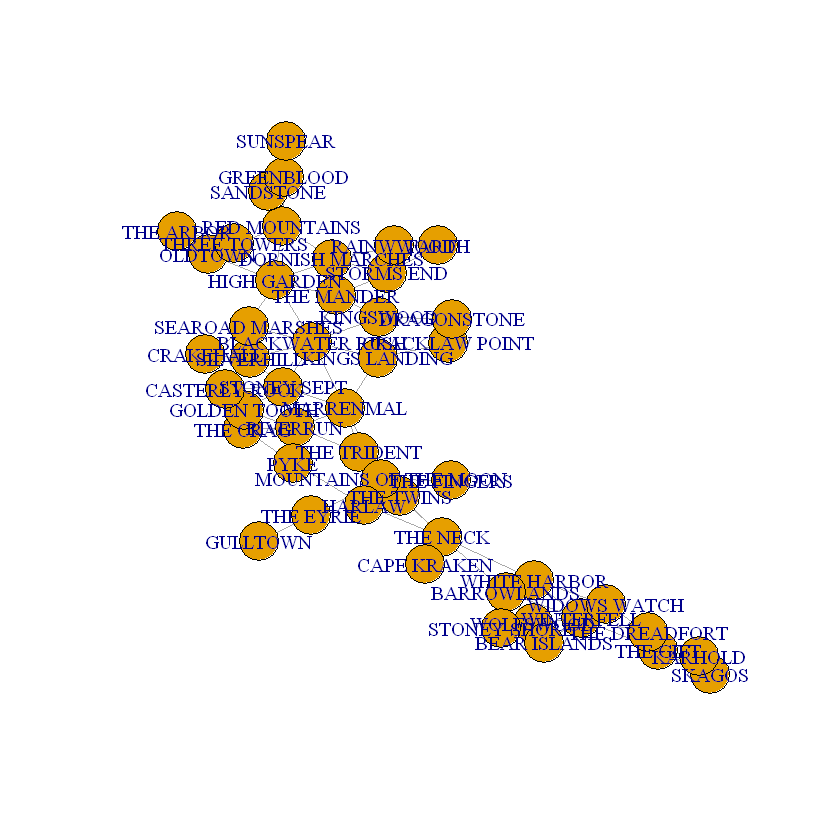

In [12]:
#Generación de objeto graph
edges <- as.character(westeros.map[complete_edges, "province"])
westeros.graph <- graph(edges = edges, directed = FALSE)
plot(westeros.graph)

In [13]:
#Generación de pagerank para las provincias
provinces.pr <- page_rank(westeros.graph)$vector
provinces.pr <- data.frame(provinces.pr)
provinces.pr
westeros.provinces2 <- merge(x = westeros.provinces, y = provinces.pr, by.x = "province", by.y = "row.names")

,provinces.pr
SKAGOS,0.013237572
THE GIFT,0.023058868
KARHOLD,0.018397280
WINTERFELL,0.035815579
THE DREADFORT,0.022335540
WIDOWS WATCH,0.016760943
WHITE HARBOR,0.021367558
BARROWLANDS,0.026068812
WOLFSWOOD,0.021452661
BEAR ISLANDS,0.016815315


In [14]:
#Provincias más valiosas
##Los comandos "View" no sirve en Notebooks como éste, sin embargo, si se copia este código a RStudio o a otro compilador de R se podrá observar
View(westeros.provinces2)

provinces.dg <- centr_degree(westeros.graph, normalized = FALSE)
provinces.dg <- data.frame(provinces.dg)
provinces.dg$res
provinces.bt <- centr_betw(westeros.graph, directed = FALSE)
provinces.bt <- data.frame(provinces.bt)
provinces.bt$res
provinces.cl <- centr_clo(westeros.graph)
provinces.cl <- data.frame(provinces.cl)
provinces.cl$res

westeros.provinces3 <- as.data.frame(westeros.provinces2)
westeros.provinces3 <- cbind(westeros.provinces2, 
                             provinces.dg=provinces.dg$res, 
                             provinces.bt=provinces.bt$res, 
                             provinces.cl=provinces.cl$res)
View(westeros.provinces3)


ERROR: Error in View(westeros.provinces2): 'View()' not yet supported in the Jupyter R kernel


ERROR: Error in eval(lhs, parent, parent): object 'westeros.provinces3' not found


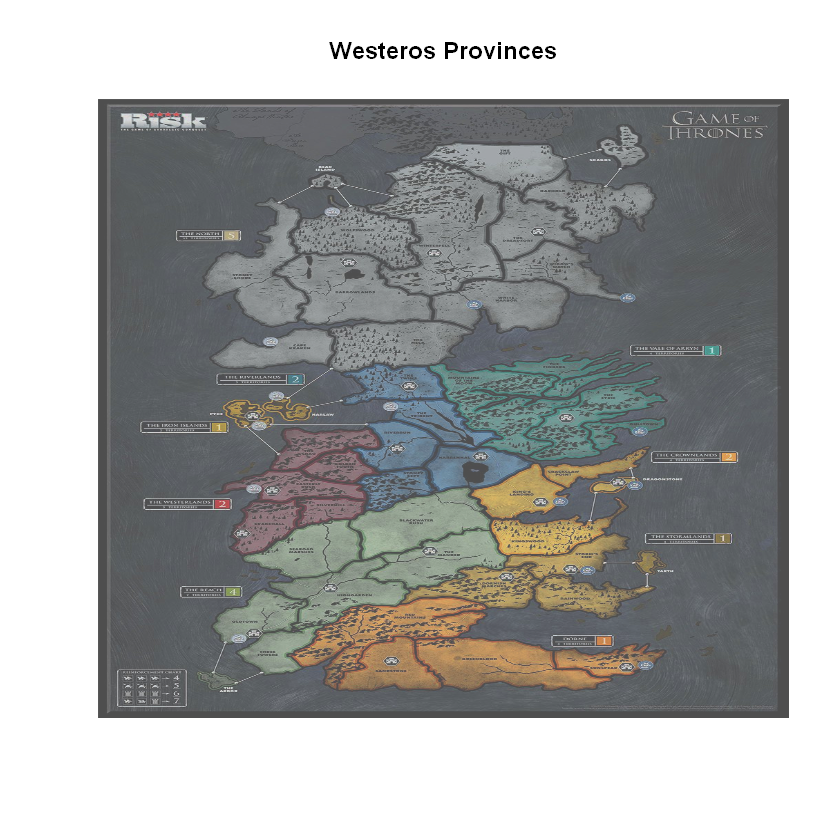

In [16]:
#Plot de los datos sobre la imagen
image <- readPNG("https://github.com/Manamaster/WesterosDataScience/blob/master/westeros2.png")
a = 1.50
b = 1.05
plot(
  c(-a,a),
  c(-b,b),
  type = 'n',
  main = "Westeros Provinces",
  xlab = "",
  ylab = "",
  bty = "n",
  xaxt = "n",
  yaxt = "n")

lim <- par()
rasterImage(image, lim$usr[1], lim$usr[3], lim$usr[2], lim$usr[4])
westeros.provinces3 <- westeros.provinces3 %>% arrange(id.prov)
NodeList <- data.frame(
  nodes = westeros.provinces3$province,
  x = westeros.provinces3$x,
  y = westeros.provinces3$y)
n <- length(complete_edges)

EdgeList <- data.frame(
  from = westeros.provinces$province[complete_edges[seq(1,n-1,2)]],
  to = westeros.provinces$province[complete_edges[seq(2,n,2)]])
wg <- graph_from_data_frame(vertices = NodeList, d= EdgeList, directed = FALSE)

plot(wg, vertex.size = westeros.provinces3$provinces.pr*500,
     add = TRUE,
     vertex.color = westeros.provinces5$color,
     edge.curved = .1,
     vertex.label = NA,
     edge.color = "black")
View(westeros.provinces3)

westeros.provinces4 <- merge(x=westeros.provinces3, y=westeros.regions, by="region")
westeros.provinces5 <- merge(x = NodeList, y = westeros.provinces4, by.x = "nodes", by.y = "province")
